# Customer Segmentation Analysis
This notebook performs customer segmentation on an e-commerce dataset to identify three clusters: Bargain Hunters, High Spenders, and Window Shoppers.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

## 1. Data Loading and Cleaning

In [6]:
# Load the dataset
data = pd.read_csv('customer_behavior_analytcis.csv')

# Display basic information
print('Dataset Info:')
print(data.info())
print('\nFirst 5 rows:')
print(data.head())

# Check for missing values
print('\nMissing Values:')
print(data.isnull().sum())

# Drop rows with missing values
data_cleaned = data.dropna().copy()

# Drop customer_id for clustering
data_features = data_cleaned.drop('customer_id', axis=1)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None

First 5 rows:
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   dis

## 2. Exploratory Data Analysis (EDA)


Summary Statistics:
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


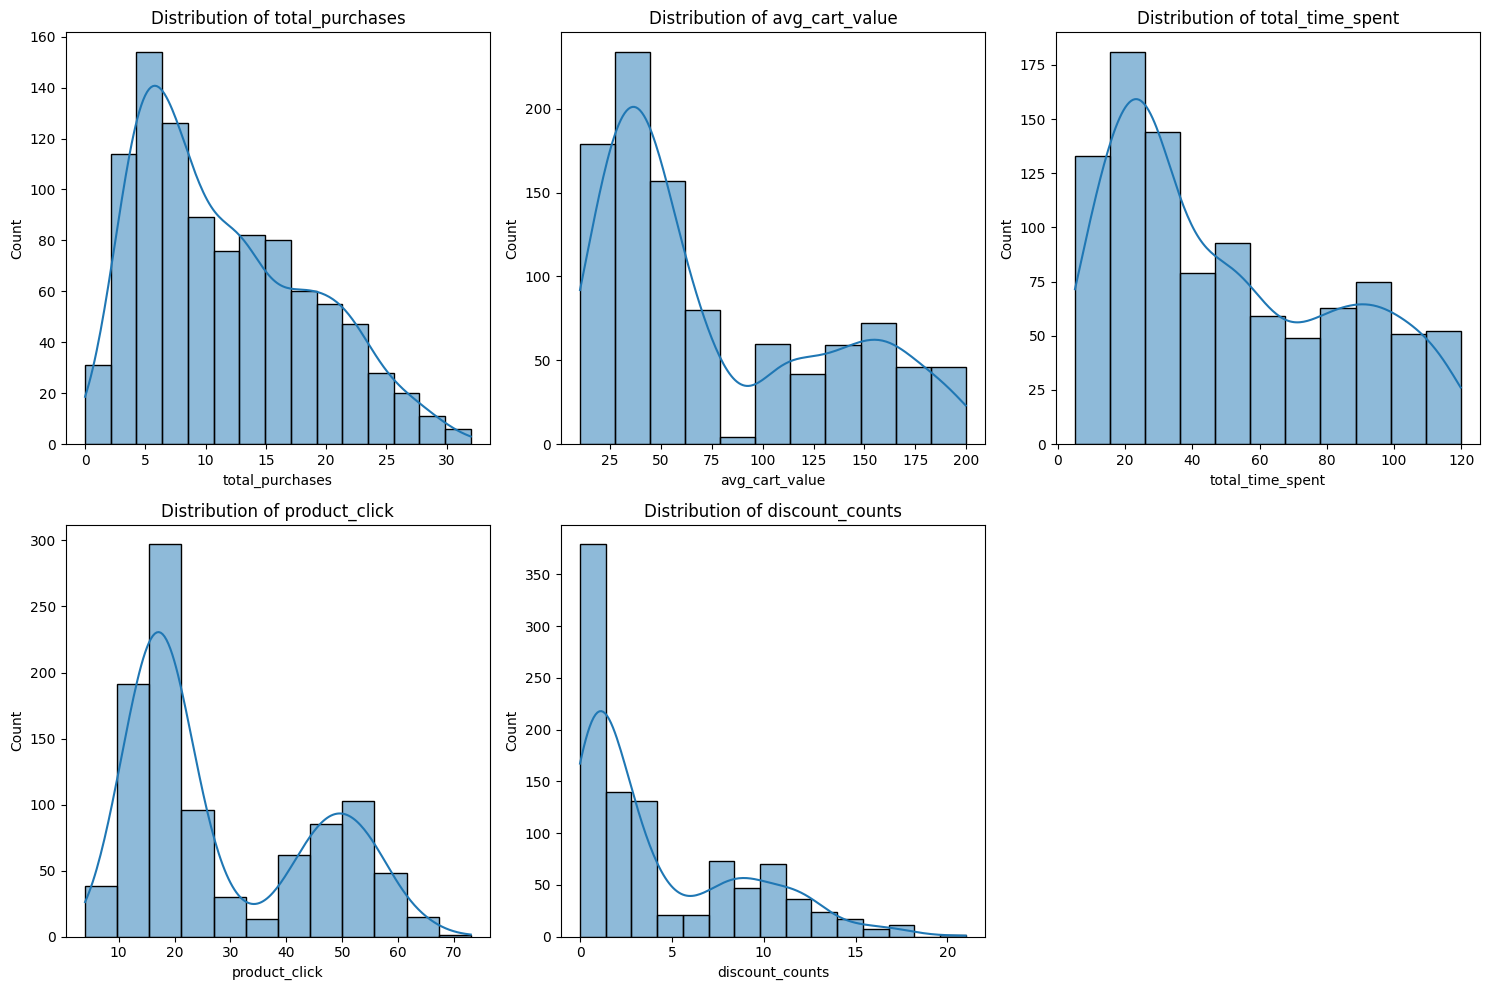

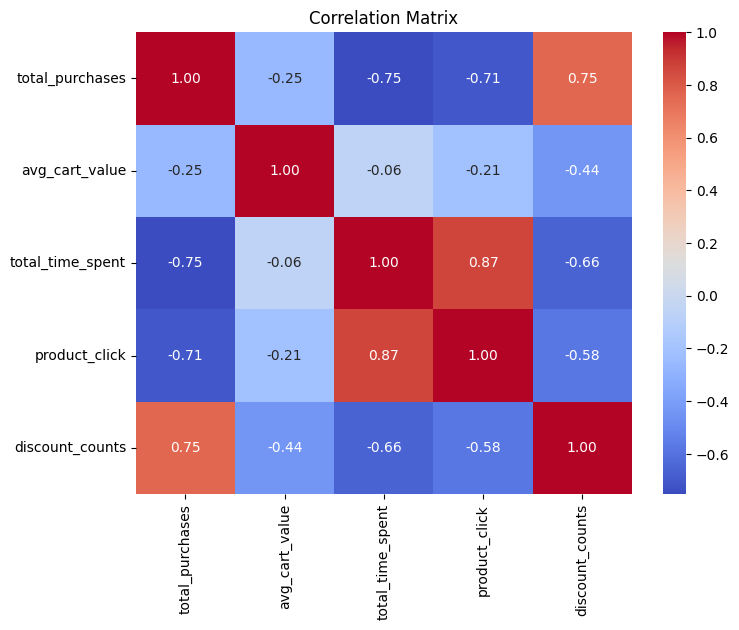

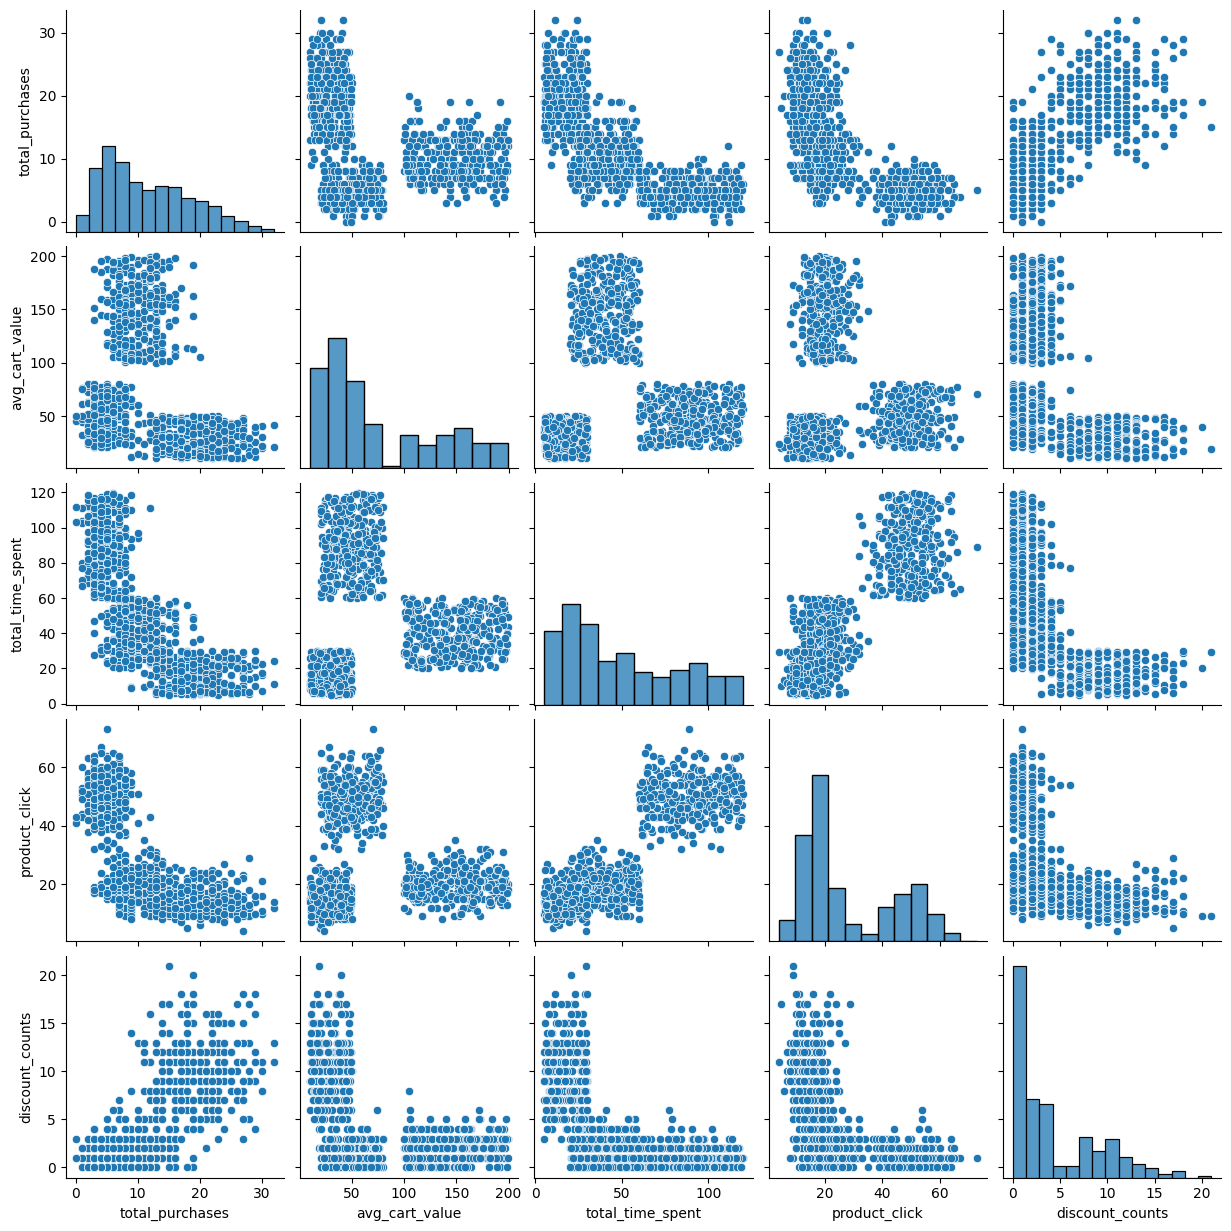

In [7]:
# Summary statistics
print('\nSummary Statistics:')
print(data_features.describe())

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_features[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(data_features)
plt.show()

## 3. Model Selection

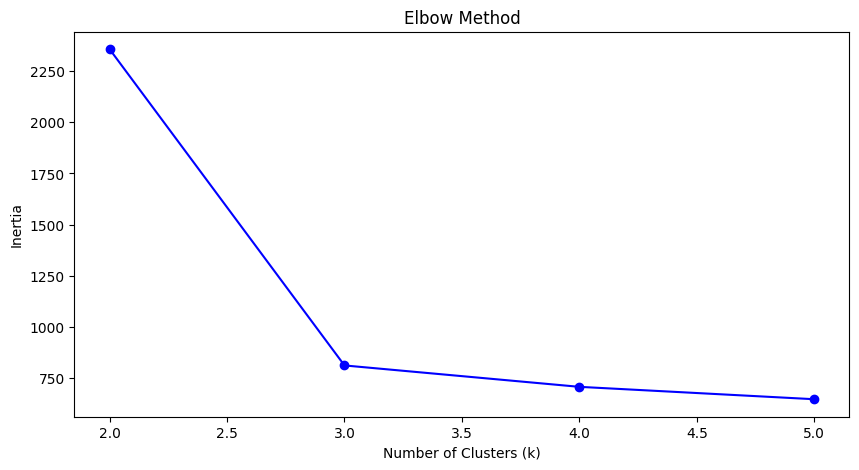

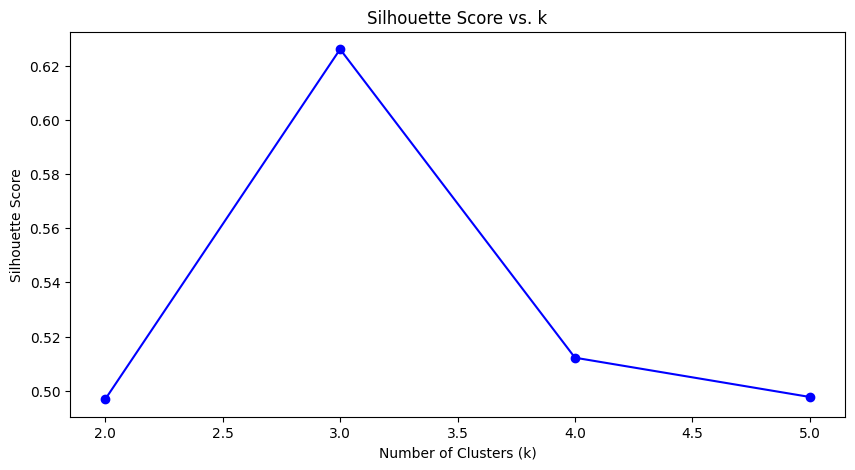

In [8]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Elbow method
inertia = []
silhouette_scores = []
K = range(2, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.show()

## 4. Clustering and Evaluation

In [9]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels
data_cleaned.loc[:, 'Cluster'] = clusters

# Silhouette score
sil_score = silhouette_score(data_scaled, clusters)
print(f'\nSilhouette Score: {sil_score:.3f}')


Silhouette Score: 0.626


## 5. Cluster Interpretation


Cluster Summary:
         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              19.711656       30.399509         17.453988      14.944785   
1              10.175385      147.327169         40.284369      19.895385   
2               4.862805       49.029848         90.114726      49.716463   

         discount_counts  Cluster  
Cluster                            
0               9.938650      0.0  
1               1.972308      1.0  
2               1.030488      2.0  


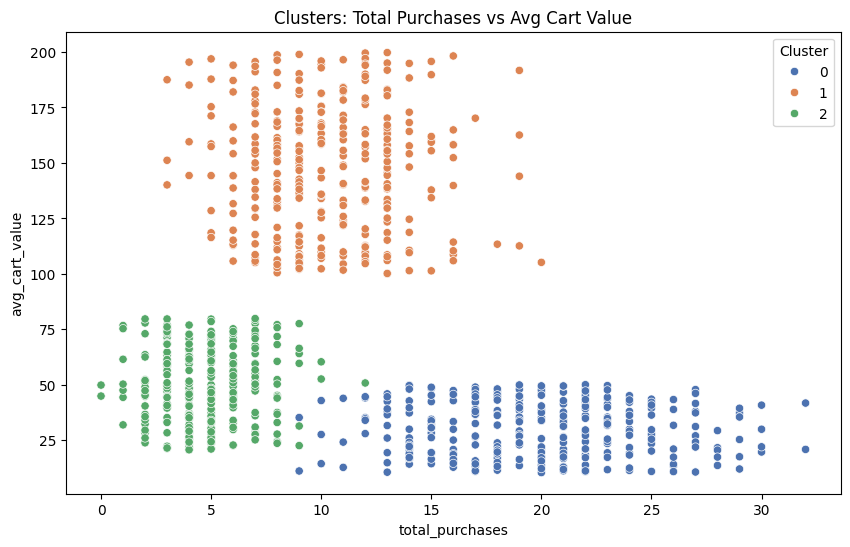


Sample of Cluster Assignments:
  customer_id  Cluster     Cluster_Name
0     CM00000        1  Bargain Hunters
1     CM00001        0  Window Shoppers
2     CM00002        2    High Spenders
3     CM00003        0  Window Shoppers
4     CM00004        1  Bargain Hunters
5     CM00005        1  Bargain Hunters
6     CM00006        0  Window Shoppers
7     CM00007        0  Window Shoppers
8     CM00008        0  Window Shoppers
9     CM00009        0  Window Shoppers
Results saved to clustered_customers.csv


In [10]:
# Cluster summary (numeric columns only)
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
cluster_summary = data_cleaned.groupby('Cluster')[numeric_columns].mean()
print('\nCluster Summary:')
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_purchases', y='avg_cart_value', hue='Cluster', data=data_cleaned, palette='deep')
plt.title('Clusters: Total Purchases vs Avg Cart Value')
plt.show()

# Assign cluster names
cluster_names = {
    0: 'Window Shoppers',
    1: 'Bargain Hunters',
    2: 'High Spenders'
}
data_cleaned.loc[:, 'Cluster_Name'] = data_cleaned['Cluster'].map(cluster_names)
print('\nSample of Cluster Assignments:')
print(data_cleaned[['customer_id', 'Cluster', 'Cluster_Name']].head(10))

# Save results
data_cleaned.to_csv('clustered_customers.csv', index=False)
print('Results saved to clustered_customers.csv')